In [1]:
import os
import numpy as np
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


In [2]:
test_path = "food_data_v2/test"

test_len = 0
for i in os.listdir(test_path):
    test_len += len(os.listdir( os.path.join( test_path, i) ))

print(f'test : {test_len}')

test : 1750


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale=1./255)

data = data_gen.flow_from_directory(
    test_path, class_mode='categorical', color_mode='rgb', shuffle=True,
    target_size=(500,500), batch_size=1750
)

X, y = data.next()
y = np.argmax(y, axis=-1)
X.shape, y.shape

Found 1750 images belonging to 35 classes.


((1750, 500, 500, 3), (1750,))

In [4]:
from tensorflow.keras.models import load_model

model = load_model('model/500_drop/22-0.93200.h5')

In [5]:
predict = np.argmax(model.predict(X), axis=-1)

In [6]:
data.class_indices

{'가지볶음': 0,
 '감자전': 1,
 '계란국': 2,
 '계란말이': 3,
 '계란찜': 4,
 '김밥': 5,
 '김치볶음밥': 6,
 '김치전': 7,
 '김치찌개': 8,
 '깍두기': 9,
 '닭갈비': 10,
 '도토리묵': 11,
 '된장찌개': 12,
 '땅콩조림': 13,
 '떡볶이': 14,
 '메추리알장조림': 15,
 '미역국': 16,
 '배추김치': 17,
 '불고기': 18,
 '비빔밥': 19,
 '삼계탕': 20,
 '소세지볶음': 21,
 '시금치나물': 22,
 '열무김치': 23,
 '유부초밥': 24,
 '육개장': 25,
 '잔치국수': 26,
 '잡채': 27,
 '제육볶음': 28,
 '칼국수': 29,
 '콩국수': 30,
 '콩나물국': 31,
 '콩나물무침': 32,
 '파전': 33,
 '호박죽': 34}

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

def print_scores(y, predict_y, model="model"):
    print(f"{model}'s accuracy : {accuracy_score(y, predict_y)}")

In [8]:
print_scores(y, predict, "model")

model's accuracy : 0.9417142857142857


In [9]:
import itertools
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결
# confusion matrix를 그려주는 함수
def plot_confusion_matrix(con_mat, labels, title='Confusion Matrix', cmap=plt.cm.get_cmap('Blues'), normalize=False, a1=10, a2=10):
    plt.figure(figsize=(a1,a2))
    plt.imshow(con_mat, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    marks = np.arange(len(labels))
    nlabels = []
    for k in range(len(con_mat)):
        n = sum(con_mat[k])
        nlabel = '{0}(n={1})'.format(labels[k],n)
        nlabels.append(nlabel)
    plt.xticks(marks, labels)
    plt.xticks(rotation=90)
    plt.yticks(marks, nlabels)

    thresh = con_mat.max() / 2.
    if normalize:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, '{:.2f}%'.format(con_mat[i, j] * 100 / n), horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    else:
        for i, j in itertools.product(range(con_mat.shape[0]), range(con_mat.shape[1])):
            plt.text(j, i, con_mat[i, j], horizontalalignment="center", color="white" if con_mat[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

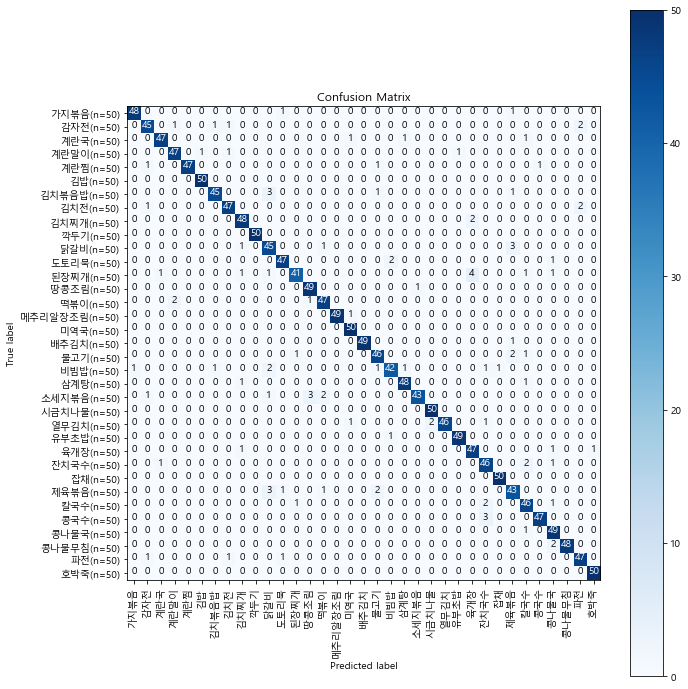

In [10]:
labels = list(data.class_indices.keys())

conf_mat = confusion_matrix(y, predict)
plot_confusion_matrix(conf_mat, labels=labels, normalize=False)

In [11]:
np.where(y != predict)

(array([  37,   41,   53,   72,   75,  134,  170,  184,  197,  200,  277,
         307,  346,  348,  356,  382,  386,  395,  410,  431,  434,  437,
         448,  451,  469,  477,  483,  486,  500,  522,  549,  561,  596,
         604,  605,  618,  620,  627,  632,  641,  643,  659,  679,  708,
         749,  751,  752,  763,  765,  796,  835,  858,  924,  933,  953,
         962,  967,  974,  991, 1010, 1043, 1064, 1073, 1075, 1086, 1103,
        1165, 1168, 1198, 1213, 1218, 1249, 1251, 1265, 1280, 1281, 1290,
        1299, 1305, 1320, 1326, 1359, 1361, 1367, 1372, 1384, 1417, 1427,
        1477, 1504, 1518, 1539, 1561, 1565, 1589, 1662, 1676, 1683, 1684,
        1686, 1708, 1744], dtype=int64),)

In [12]:
len(np.where(y != predict)[0])

102

In [13]:
reversed_dict = dict(map(reversed, data.class_indices.items()))
reversed_dict

{0: '가지볶음',
 1: '감자전',
 2: '계란국',
 3: '계란말이',
 4: '계란찜',
 5: '김밥',
 6: '김치볶음밥',
 7: '김치전',
 8: '김치찌개',
 9: '깍두기',
 10: '닭갈비',
 11: '도토리묵',
 12: '된장찌개',
 13: '땅콩조림',
 14: '떡볶이',
 15: '메추리알장조림',
 16: '미역국',
 17: '배추김치',
 18: '불고기',
 19: '비빔밥',
 20: '삼계탕',
 21: '소세지볶음',
 22: '시금치나물',
 23: '열무김치',
 24: '유부초밥',
 25: '육개장',
 26: '잔치국수',
 27: '잡채',
 28: '제육볶음',
 29: '칼국수',
 30: '콩국수',
 31: '콩나물국',
 32: '콩나물무침',
 33: '파전',
 34: '호박죽'}

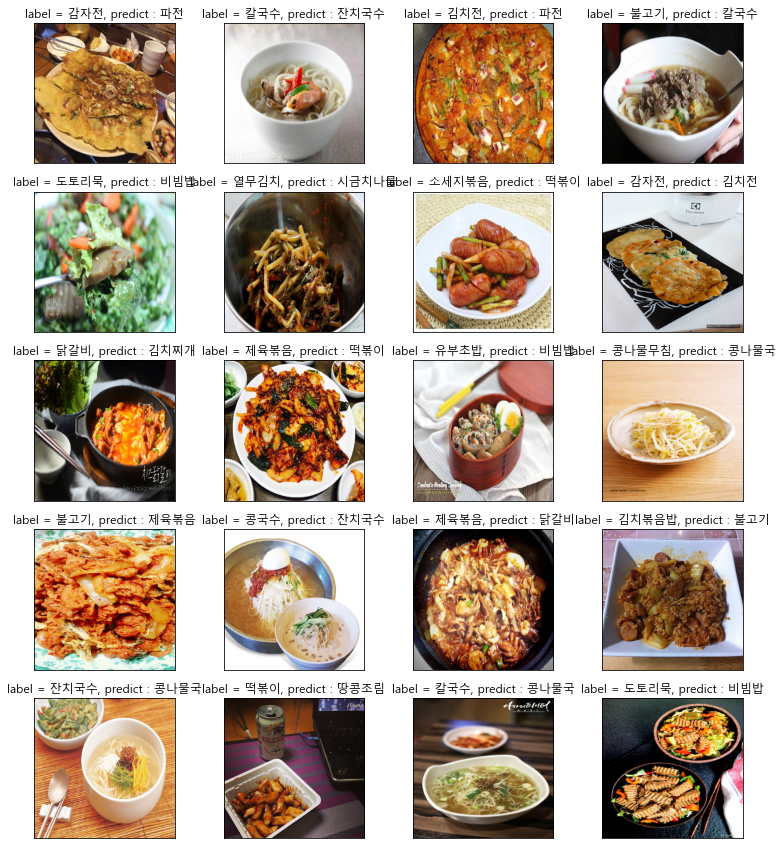

In [14]:
plt.figure(figsize=(13,15))
for idx, i in enumerate(np.where(y != predict)[0][0:20]):
    plt.subplot(5, 4, idx + 1)
    plt.title(f'label = {reversed_dict[y[i]]}, predict : {reversed_dict[predict[i]]}')
    plt.imshow(X[i])
    plt.xticks([])
    plt.yticks([])
plt.show()